Trainning the model with a SVC 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

df = pd.read_csv('data/projects.csv')

In [5]:
df['finalizado'] = df['nao_finalizado'].map({1:0, 0:1})

df = df.query('horas_esperadas > 0')

df.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,0,75.0,6985.0,1
2,0,87.0,14205.0,1
3,1,13.0,100.0,0
4,0,2.0,202.0,1
5,0,49.0,1096.0,1


In [19]:
y = df['finalizado']

x = df[['horas_esperadas', 'preco']]

seed = 2043

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, random_state=seed, stratify=y)

model = SVC(gamma = 'auto')
model.fit(treino_x,treino_y)

prevision = model.predict(teste_x)

accuracy = accuracy_score(teste_y, prevision) * 100

print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 57.96%


Treatment


1.0 100.0 101.0 28398.0


/home/pedrosalzani/Documents/Codes - STUDIES/Machine Learning 01 - Alura/firstModel/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


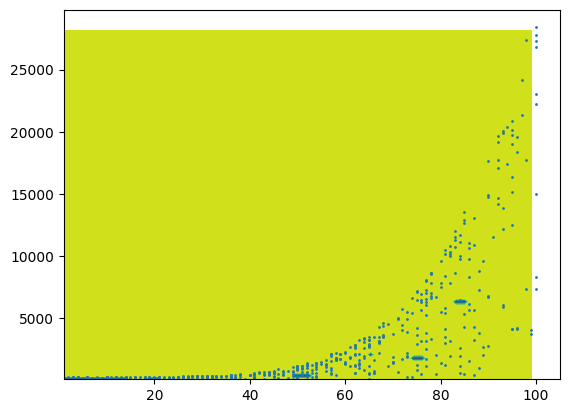

In [18]:
min_x = teste_x["horas_esperadas"].min()
max_x = teste_x["horas_esperadas"].max()

min_y = teste_x["preco"].min()
max_y = teste_x["preco"].max()

print(min_x, max_x, min_y, max_y)

pixels = 100


x_axis = np.arange(min_x, max_x, (max_x - min_x) / pixels)
y_axis = np.arange(min_y, max_y, (max_y - min_y) / pixels)


xx, yy = np.meshgrid(x_axis, y_axis)

points = np.c_[xx.ravel(), yy.ravel()]

z = model.predict(points)

z = np.array(z).reshape(xx.shape)

plt.contourf(xx, yy, z)

plt.scatter(teste_x["horas_esperadas"], teste_x["preco"], s=1)